In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[[4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 ...
 [4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]]


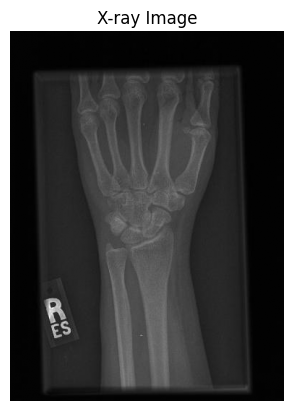

Streaming output truncated to the last 5000 lines.
  71  71  69  67  65  63  63  63  62  61  61  60  59  59  60  56  53  50
  43  36  34  38  36  36  36  37  37  38  38  38  39  39  39  39  39  39
  39  39  40  40  40  40  40  40  40  40  41  41  41  41  41  41  41  41
  40  40  40  40  40  40  40  40  40  40  39  39  39  39  38  38  37  37
  37  37  37  37  37  37  33  34  34  33  30  28  28  29  31  36  41  42
  37  28  19  15   9   6   3   2   3   4   3   2   3   3   3   3   3   3
   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3
   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   4   4
   4]
[  5   5   5   4   4   3   3   3   3   3   3   3   3   3   3   3   3   3
   3   3   3   3   3   3   4   4   4   4   4   4   4   4   4   5   6   7
  10  15  22  27  34  39  45  46  43  40  40  41  38  37  37  36  36  37
  37  38  37  37  37  38  38  39  39  39  39  40  40  41  41  40  40  39
  40  40  40  40  40  40  40  40  41  41  41  41  41  41  41  41  4

In [ ]:
image_path = "s1.jpg"

# if not os.path.exists(image_path):
#     print(f"❌ File not found at: {os.path.abspath(image_path)}")
# else:
#     # Try reading the image
#     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#     # Verify loading
#     if image is None:
#         print("❌ OpenCV could not read the image. Try using PIL instead.")
#     else:
#         print("✅ Image loaded successfully!")
#         print("Matrix shape:", image.shape)
#         print("Data type:", image.dtype)

#         # Display
#         plt.imshow(image, cmap='gray')
#         plt.title("X-ray Image")
#         plt.axis('off')
#         plt.show()

image_path = "s1.jpg"

# Read the image in grayscale (1 channel)
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

print(image)
# Show the image
plt.imshow(image, cmap='gray')
plt.title("X-ray Image")
plt.axis('off')
plt.show()

# Convert image to numpy matrix
matrix = np.array(image)

print("Matrix shape:", matrix.shape)
for i in matrix:
    print(i)

In [ ]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# # Paths
# base_dir = "data"  # your main folder
# output_dir = "dataset"  # where you want train/val/test folders

# # Create output structure
# for split in ["train", "val", "test"]:
#     for category in ["fracture", "normal"]:
#         os.makedirs(os.path.join(output_dir, split, category), exist_ok=True)

# # Split ratios
# train_ratio = 0.7
# val_ratio = 0.15
# test_ratio = 0.15

# for category in ["fracture", "normal"]:
#     # Get all file names
#     files = os.listdir(os.path.join(base_dir, category))
#     files = [f for f in files if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

#     # Shuffle and split
#     train_files, temp_files = train_test_split(files, test_size=(1-train_ratio), random_state=42)
#     val_files, test_files = train_test_split(temp_files, test_size=(test_ratio / (test_ratio + val_ratio)), random_state=42)

#     # Copy files
#     for f in train_files:
#         shutil.copy(os.path.join(base_dir, category, f), os.path.join(output_dir, "train", category))
#     for f in val_files:
#         shutil.copy(os.path.join(base_dir, category, f), os.path.join(output_dir, "val", category))
#     for f in test_files:
#         shutil.copy(os.path.join(base_dir, category, f), os.path.join(output_dir, "test", category))

# print("✅ Dataset successfully split into train/val/test folders!")

✅ Dataset successfully split into train/val/test folders!


In [ ]:
!ls

data  s1.jpg  sample_data


In [ ]:
import os
import pathlib
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix

# reproducibility (optional)
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

# Basic GPU check (optional)
print("TF version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TF version: 2.19.0
GPU available: []


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_and_show(path, size=(224,224), cmap='gray'):
    img = Image.open(path).convert('L')  # grayscale
    img = img.resize(size)
    arr = np.array(img) / 255.0   # normalize to [0,1]
    plt.imshow(arr, cmap=cmap)
    plt.title(os.path.basename(path))
    plt.axis('off')
    plt.show()
    return arr

# Example: replace with a real path in your notebook
# preview = load_and_show("dataset/train/normal/sample1.jpg")


In [ ]:
DATA_DIR = pathlib.Path("dataset")   # change if needed
IMG_SIZE = (224, 224)   # change to desired size (224 is common)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

train_dir = DATA_DIR / "train"
val_dir   = DATA_DIR / "val"
test_dir  = DATA_DIR / "test"

train_ds_raw = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='binary',            # binary classification
    color_mode='grayscale',         # X-rays are grayscale
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    seed=SEED,
    shuffle=True
)

val_ds_raw = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='binary',
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    seed=SEED,
    shuffle=False
)

test_ds_raw = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='binary',
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    seed=SEED,
    shuffle=False
)

# Store class names before preparing the dataset
class_names = train_ds_raw.class_names

# Show class names
print("Class names:", class_names)

Found 103 files belonging to 2 classes.
Found 22 files belonging to 2 classes.
Found 23 files belonging to 2 classes.
Class names: ['fracture', 'normal']


In [ ]:
# Normalization layer expects float inputs in [0,1], but image_dataset returns uint8 => we cast
normalization_layer = layers.Rescaling(1./255)

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),              # horizontal flip
    layers.RandomRotation(0.05),                  # small rotation
    layers.RandomZoom(0.05),
], name="data_augmentation")

def prepare(ds, augment=False):
    ds = ds.map(lambda x, y: (tf.cast(x, tf.float32), y), num_parallel_calls=AUTOTUNE)
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
    ds = ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=AUTOTUNE)
    return ds.cache().prefetch(buffer_size=AUTOTUNE)

train_ds = prepare(train_ds_raw, augment=True)
val_ds   = prepare(val_ds_raw, augment=False)
test_ds  = prepare(test_ds_raw, augment=False)

In [ ]:
def make_model(input_shape=(*IMG_SIZE, 1)):
    inputs = keras.Input(shape=input_shape)
    x = layers.Conv2D(32, 3, activation="relu", padding="same")(inputs)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    x = layers.MaxPooling2D(2)(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)  # binary
    model = keras.Model(inputs, outputs, name="scaphoid_cnn")
    return model

model = make_model()
model.summary()


Model: "scaphoid_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,993 (394.50 KB)

 Trainable params: 100,993 (394.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Optional: compute class weights if classes are imbalanced
def compute_class_weights(dataset):
    # dataset yields batches (images, labels)
    labels = np.concatenate([y.numpy().ravel() for x, y in dataset], axis=0)
    # count
    from sklearn.utils import class_weight
    weights = class_weight.compute_class_weight("balanced", classes=np.unique(labels), y=labels)
    return {int(c): w for c, w in zip(np.unique(labels), weights)}

# If you want to compute weights use this:
# class_weights = compute_class_weights(train_ds.unbatch().batch(1024))
# print(class_weights)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=[keras.metrics.BinaryAccuracy(name="accuracy"),
             keras.metrics.AUC(name="auc")]
)

EPOCHS = 12
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    # class_weight=class_weights,  # uncomment if computed
)


Epoch 1/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4568 - auc: 0.4680 - loss: 0.6947 - val_accuracy: 0.4545 - val_auc: 0.8250 - val_loss: 0.6922
Epoch 2/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.4872 - auc: 0.5293 - loss: 0.6938 - val_accuracy: 0.4545 - val_auc: 0.7417 - val_loss: 0.6919
Epoch 3/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.4643 - auc: 0.5530 - loss: 0.6929 - val_accuracy: 0.4545 - val_auc: 0.5375 - val_loss: 0.6916
Epoch 4/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4749 - auc: 0.6082 - loss: 0.6929 - val_accuracy: 0.4545 - val_auc: 0.6500 - val_loss: 0.6912
Epoch 5/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4440 - auc: 0.4995 - loss: 0.6949 - val_accuracy: 0.4545 - val_auc: 0.9000 - val_loss: 0.6909
Epoch 6/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.4471 - auc: 0.6429 - loss: 0.6923 - val_accuracy: 0.4545 - val_auc: 0.9500 - val_loss: 0.6905
Epoch 7/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.44

In [ ]:
# Get predictions and labels for the entire test set
y_true = []
y_pred = []
# class_names = sorted(os.listdir("dataset/test")) # This line is no longer needed

for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy().ravel().tolist())
    y_pred.extend((preds.ravel() > 0.5).astype(int).tolist())

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Confusion Matrix:
[[10  0]
 [13  0]]

Classification Report:
              precision    recall  f1-score   support

    fracture       0.43      1.00      0.61        10
      normal       0.00      0.00      0.00        13

    accuracy                           0.43        23
   macro avg       0.22      0.50      0.30        23
weighted avg       0.19      0.43      0.26        23



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


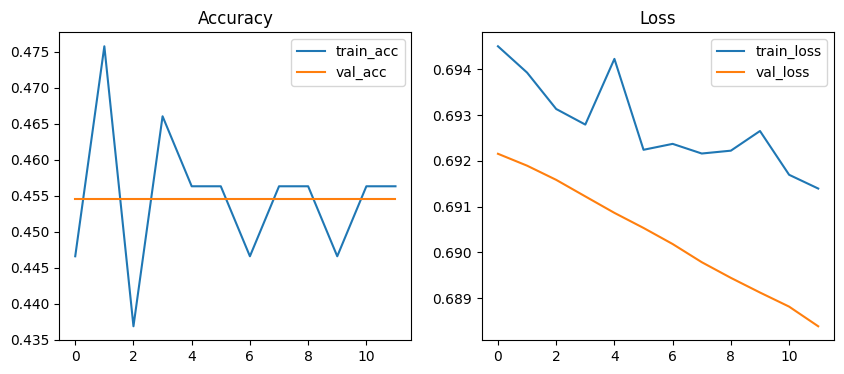

In [ ]:
plt.figure(figsize=(10,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()

plt.show()


In [ ]:
# Function to Predict on a single image...

from tensorflow.keras.utils import load_img, img_to_array

img_path = "s2.jpg"  # put your image path here
img = load_img(img_path, target_size=(224,224), color_mode='grayscale') # Added color_mode='grayscale'
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)[0][0]

if prediction > 0.5:
    print("🩻 Predicted: Scaphoid Injury")
else:
    print("✅ Predicted: Normal")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
✅ Predicted: Normal


In [ ]:
MODEL_PATH = "scaphoid_detector.keras"
model.save(MODEL_PATH, include_optimizer=False)
print("Saved model to", MODEL_PATH)

Saved model to scaphoid_detector.keras
